In [4]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

def load_and_prepare_data(file_path):
    """
    Load and prepare the market basket data for analysis.
    """
    # Read the CSV file
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/market.csv')

    # Convert quantities to binary (1 if product was bought, 0 if not)
    for column in df.columns:
        if column != 'TransationID':
            df[column] = df[column].apply(lambda x: 1 if x > 0 else 0)

    # Drop TransactionID if it exists
    if 'TransationID' in df.columns:
        df = df.drop('TransationID', axis=1)

    return df

def perform_market_basket_analysis(df, min_support=0.1, min_confidence=0.5):
    """
    Perform market basket analysis using the Apriori algorithm.

    Parameters:
    -----------
    df : pandas.DataFrame
        The prepared transaction data
    min_support : float
        Minimum support threshold for frequent itemsets
    min_confidence : float
        Minimum confidence threshold for association rules

    Returns:
    --------
    frequent_itemsets : pandas.DataFrame
        The frequent itemsets found
    rules : pandas.DataFrame
        The association rules discovered
    """
    # Generate frequent itemsets
    frequent_itemsets = apriori(df,
                              min_support=min_support,
                              use_colnames=True)

    # Generate association rules
    # Updated the call to association_rules()
    rules = association_rules(frequent_itemsets,
                            metric="confidence",
                            min_threshold=min_confidence)

    # Sort rules by lift
    rules = rules.sort_values('lift', ascending=False)

    return frequent_itemsets, rules

def format_rule(row):
    """
    Format a rule for pretty printing.
    """
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    return (f"Rule: {antecedents} -> {consequents}\n"
            f"Support: {row['support']:.3f}\n"
            f"Confidence: {row['confidence']:.3f}\n"
            f"Lift: {row['lift']:.3f}\n")

def analyze_market_basket(file_path, min_support=0.1, min_confidence=0.5):
    """
    Main function to perform market basket analysis.
    """
    # Load and prepare data
    print("Loading and preparing data...")
    df = load_and_prepare_data(file_path)

    # Perform analysis
    print("\nPerforming market basket analysis...")
    frequent_itemsets, rules = perform_market_basket_analysis(
        df, min_support, min_confidence
    )

    # Print summary statistics
    print("\nAnalysis Summary:")
    print(f"Number of transactions analyzed: {len(df)}")
    print(f"Number of products: {len(df.columns)}")
    print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")
    print(f"Number of rules generated: {len(rules)}")

    # Print top 10 rules by lift
    print("\nTop 10 Association Rules by Lift:")
    print("-" * 50)
    for _, rule in rules.head(10).iterrows():
        print(format_rule(rule))
        print("-" * 50)

    return frequent_itemsets, rules

# Example usage
if __name__ == "__main__":
    # Set parameters
    MIN_SUPPORT = 0.1  # Items must appear in at least 10% of transactions
    MIN_CONFIDENCE = 0.5  # Rules must be correct at least 50% of the time

    # Run analysis
    frequent_itemsets, rules = analyze_market_basket(
        'market.csv',
        min_support=MIN_SUPPORT,
        min_confidence=MIN_CONFIDENCE
    )

Loading and preparing data...

Performing market basket analysis...

Analysis Summary:
Number of transactions analyzed: 464
Number of products: 22
Number of frequent itemsets found: 549
Number of rules generated: 837

Top 10 Association Rules by Lift:
--------------------------------------------------
Rule: Bacon, Cheese -> Butter
Support: 0.138
Confidence: 0.615
Lift: 1.641

--------------------------------------------------
Rule: Sugar, Bacon -> Meat
Support: 0.119
Confidence: 0.632
Lift: 1.630

--------------------------------------------------
Rule: Onion, Cheese -> Butter
Support: 0.116
Confidence: 0.607
Lift: 1.618

--------------------------------------------------
Rule: Salt, Meat -> Sugar
Support: 0.103
Confidence: 0.593
Lift: 1.617

--------------------------------------------------
Rule: Shampoo, Hazelnut -> Butter
Support: 0.106
Confidence: 0.605
Lift: 1.613

--------------------------------------------------
Rule: Bacon, Toothpaste -> Butter
Support: 0.106
Confidence: 0.60

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


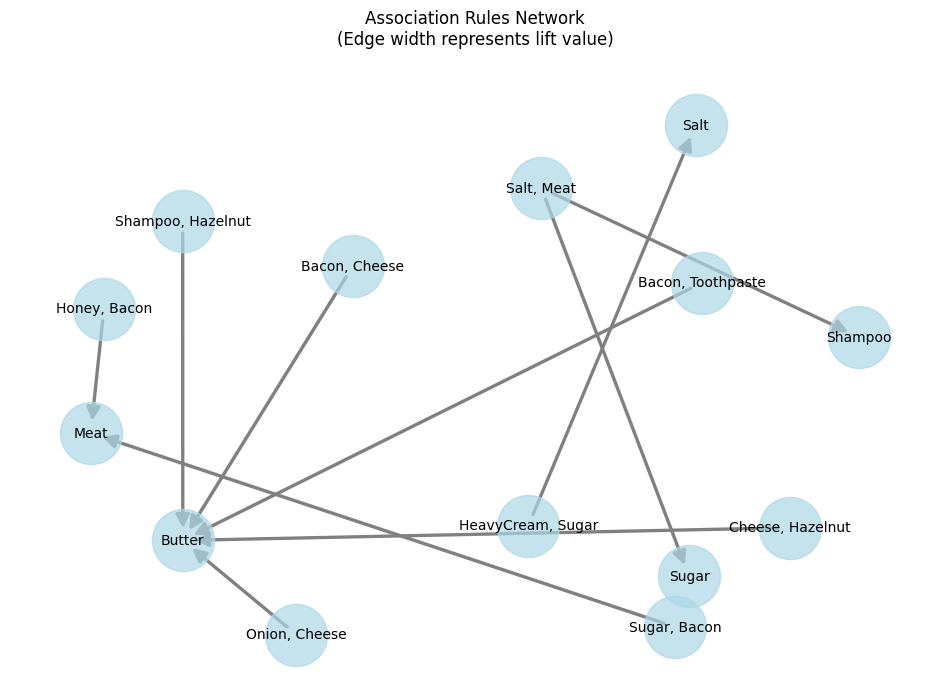

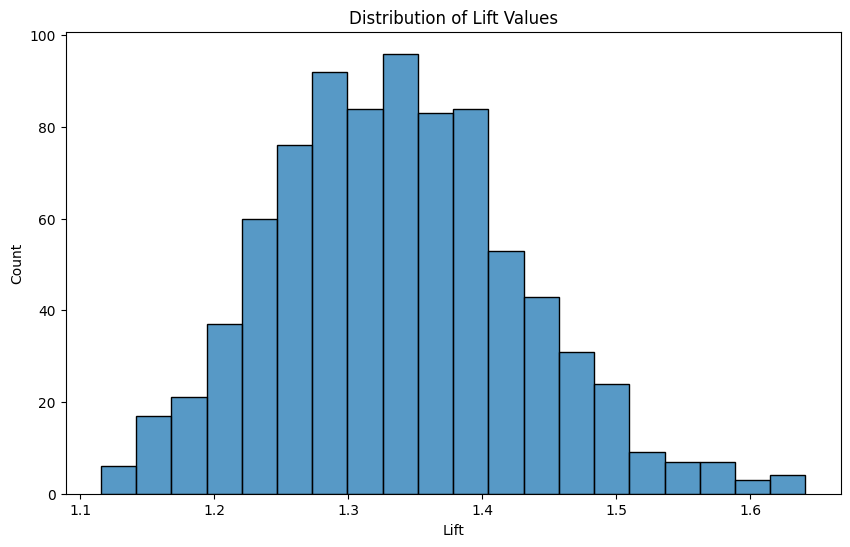

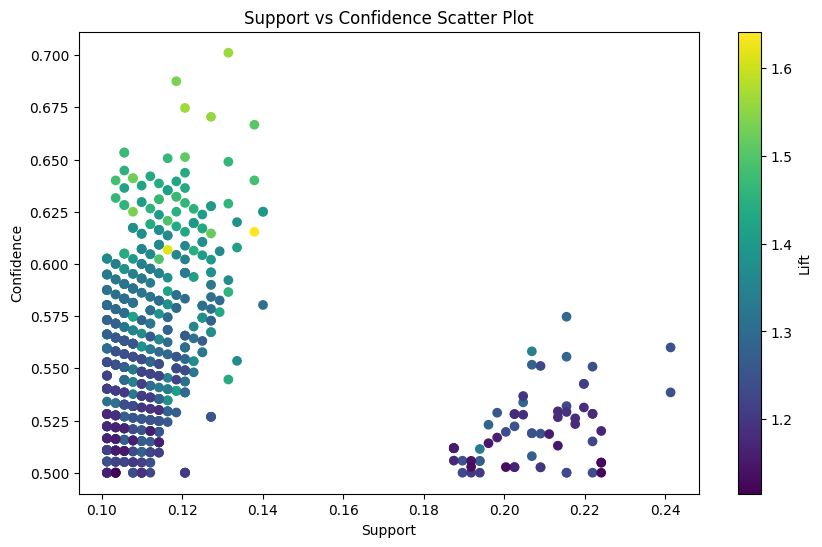

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def visualize_rules(rules, min_lift=1.2, max_rules=10):
    """
    Create network visualization of association rules.

    Parameters:
    -----------
    rules : pandas.DataFrame
        Association rules dataframe from mlxtend
    min_lift : float
        Minimum lift value for rules to be visualized
    max_rules : int
        Maximum number of rules to visualize
    """
    # Filter rules based on lift
    rules = rules[rules['lift'] >= min_lift].head(max_rules)

    # Create network graph
    G = nx.DiGraph()

    # Add edges with lift as weight
    for _, row in rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        G.add_edge(antecedents,
                  consequents,
                  weight=row['lift'],
                  confidence=row['confidence'])

    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Create layout
    pos = nx.spring_layout(G, k=2)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos,
                          node_color='lightblue',
                          node_size=2000,
                          alpha=0.7)

    # Draw edges
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    nx.draw_networkx_edges(G, pos,
                          edge_color='gray',
                          width=[w * 1.5 for w in weights],
                          arrows=True,
                          arrowsize=20)

    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Add title and adjust layout
    plt.title('Association Rules Network\n(Edge width represents lift value)',
              pad=20)
    plt.axis('off')

    return plt

def plot_lift_distribution(rules):
    """
    Create a histogram of lift values.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=rules, x='lift', bins=20)
    plt.title('Distribution of Lift Values')
    plt.xlabel('Lift')
    plt.ylabel('Count')
    return plt
    plt.show()

def create_support_confidence_scatter(rules):
    """
    Create a scatter plot of support vs confidence colored by lift.
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(rules['support'],
                         rules['confidence'],
                         c=rules['lift'],
                         cmap='viridis')
    plt.colorbar(scatter, label='Lift')
    plt.title('Support vs Confidence Scatter Plot')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    return plt
    plt.show()

def visualize_market_basket_analysis(rules):
    """
    Create and save all visualizations.
    """
    # Create network visualization
    network_plot = visualize_rules(rules)
    network_plot.savefig('rules_network.png',
                        bbox_inches='tight',
                        dpi=300)
    network_plot.show()

    # Create lift distribution plot
    lift_plot = plot_lift_distribution(rules)
    lift_plot.savefig('lift_distribution.png',
                      bbox_inches='tight',
                      dpi=300)
    lift_plot.show()

    # Create support vs confidence scatter plot
    scatter_plot = create_support_confidence_scatter(rules)
    scatter_plot.savefig('support_confidence_scatter.png',
                        bbox_inches='tight',
                        dpi=300)
    scatter_plot.show()

# Example usage
if __name__ == "__main__":
    # Assuming you have already run the market basket analysis
    # and have the rules DataFrame
    visualize_market_basket_analysis(rules)